<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# 🌱 **기본 과제**

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다.

다음 데이터셋은 미국 시애틀 King County 지역의 2014년 5월 ~ 2015년 5월 주택 판매 가격 데이터입니다.
   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)

이 데이터를 사용해 다음 과제를 마크다운과 코드를 활용하여 진행해 주세요.

## **Part 1. Linear Regression**

### **1-1. 데이터 준비하기** 

- 데이터셋을 불러오세요. 
  - 캐글에서 다운받아 불러오거나 다음 url을 통해 불러옵니다. <br> 
    'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv'
- 특성들과 타겟(price) 간의 상관계수를 계산하고, 가장 상관계수가 높은 특성을 찾으세요.
- 가장 상관계수가 높은 특성과 타겟을 scatter plot으로 시각화 하세요.
  - x축은 특성, y축은 타겟을 나타내야 합니다. 

##### **Q1. 타겟과 상관계수가 가장 높은 특성의 이름을 제출해 주세요.**

In [ ]:
# 데이터셋을 불러옵니다. 

import pandas as pd

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# df.corr()로 타겟과 특성들의 상관계수를 확인합니다. 
df.corr().sort_values(by='price', ascending=False)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
grade,0.008130,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,-0.010842,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050
sqft_living15,-0.002901,0.585379,0.391638,0.568634,0.756420,0.144608,0.279885,0.086463,0.280439,-0.092824,0.713202,0.731870,0.200355,0.326229,-0.002673,-0.279033,0.048858,0.334605,1.000000,0.183192
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
sqft_basement,-0.005151,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,0.080588,0.276947,0.174105,0.168392,-0.051943,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,0.200355,0.017276
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
lat,-0.001891,0.307003,-0.008931,0.024573,0.052529,-0.085683,0.049614,-0.014274,0.006157,-0.014941,0.114084,-0.000816,0.110538,-0.148122,0.029398,0.267048,1.000000,-0.135512,0.048858,-0.086419


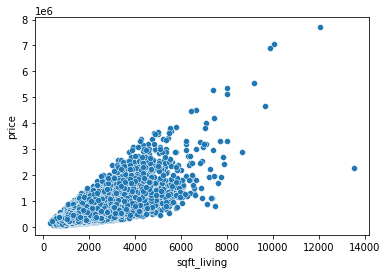

In [ ]:
# 가장 상관계수가 높은 특성과 타겟을 scatter plot으로 나타냅니다. 

import seaborn as sns 
import numpy as np 

x = df['sqft_living']
y = df['price']

sns.scatterplot(x=x, y=y);

### **1-2. 기준모델**

- `sqft_living`과 `price`의 scatter plot을 그리고 기준모델을 시각화해 보세요. 

##### **Q2. 기준모델의 값을 제출해 주세요. (소수점 이하 반올림)**

baseline model: 540088.0


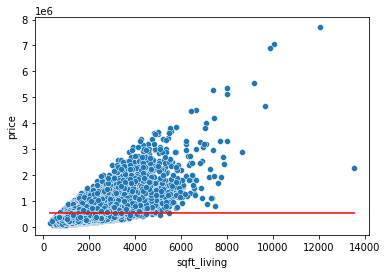

In [ ]:
# 기준모델 값
predict = y.mean()
print('baseline model:', np.around(predict))

# 기준모델 시각화 
sns.lineplot(x=x, y=predict, color='r')

# scatter plot
sns.scatterplot(x=x, y=y);

### **1-3. Simple Linear Regression**

- Scikit-Learn 라이브러리를 사용하여 단순선형회귀 모델을 만드세요.
  - 특성은 `sqft_living`이고, 타겟은 `price`입니다.
- 모델 학습 후, 특성 `sqft_living`에 대한 타겟 `price`의 예측값을 구하세요. 

##### **Q3. 단순선형회귀 모델이 예측한 결과에서 index가 0인 값을 제출해 주세요. (소수점 이하 반올림)**

In [ ]:
# scikit-learn 의 LinearRegression 라이브러리를 불러옵니다. 
from sklearn.linear_model import LinearRegression

# X 특성 행렬과 y 타겟 벡터를 만듭니다.
feature = ['sqft_living']
target = 'price'
X_simple = df[feature]
y_target = df[target]

In [ ]:
# 단순선형회귀 모델을 학습합니다.
simple_model = LinearRegression()
simple_model.fit(X_simple, y_target)

LinearRegression()

In [ ]:
# 단순선형회귀 모델의 예측값 
pred_simple = np.around(simple_model.predict(X_simple))

In [ ]:
pd.Series(pred_simple)

0        287555.0
1        677622.0
2        172499.0
3        506441.0
4        427867.0
           ...   
21608    385773.0
21609    604660.0
21610    242655.0
21611    405417.0
21612    242655.0
Length: 21613, dtype: float64

In [ ]:
# 관측값
y_target

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

### **1-4. Multiple Linear Regression**

- Scikit-Learn 라이브러리를 사용하여 다중선형회귀 모델을 만드세요. 
  - 특성은 `sqft_living`, `bathrooms`이고, 타겟은 `price`입니다.
- 모델 학습 후, 두 특성 `sqft_living`, `bathrooms`에 대한 타겟 `price`의 예측값을 구하세요. 

##### **Q4. 다중선형회귀 모델이 예측한 결과에서 index가 0인 값을 제출해 주세요. (소수점 이하 반올림)**

In [ ]:
# X 특성 행렬을 만듭니다. 
features = ['sqft_living', 'bathrooms']
X_multiple = df[features]

# 모델을 학습합니다.
multiple_model = LinearRegression()
multiple_model.fit(X_multiple, y_target)

LinearRegression()

In [ ]:
# 예측값
pred_multiple = np.around(multiple_model.predict(X_multiple))
pd.Series(pred_multiple)

0        290371.0
1        678525.0
2        173976.0
3        501478.0
4        427153.0
           ...   
21608    381986.0
21609    603422.0
21610    246240.0
21611    401859.0
21612    246240.0
Length: 21613, dtype: float64

## **Part 2. 평가지표**

**Part 1**에서 구한 기준모델, 단순선형회귀, 다중선형회귀의 성능을 평가해 봅니다.
- 각 모델의 mse, rmse, mae, $R^2$ 값을 구하세요. 
- 위에서 구한 평가지표를 비교해 보고, 어느 모델의 성능이 가장 좋을지 생각해 보세요. 

##### **Q5. 다중선형회귀 모델의 $R^2$을 반올림하여 소수 첫째 자리까지 구한 값을 제출해 주세요.**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# mse, rmse, mae, r2를 출력하는 함수입니다.
def eval_models(y_pred, y_real=y_target) :
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    return mse, rmse, mae, r2

In [ ]:
# 기준모델을 list에 저장합니다. 
predict = [predict]*len(df)

In [ ]:
# 평가지표를 구합니다. 
base_mse, base_rmse, base_mae, base_r2 = eval_models(predict)
simple_mse, simple_rmse, simple_mae, simple_r2 = eval_models(pred_simple)
multiple_mse, multiple_rmse, multiple_mae, multiple_r2 = eval_models(pred_multiple)

In [ ]:
# 각 모델의 평가지표를 비교해 봅니다.
comparison_metrics = pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2'], columns=['Base','Simple', 'Multiple'])
comparison_metrics['Base'] = [base_mse, base_rmse, base_mae, base_r2 ]
comparison_metrics['Simple'] = [simple_mse, simple_rmse, simple_mae, simple_r2]
comparison_metrics['Multiple'] = [multiple_mse, multiple_rmse, multiple_mae, multiple_r2]
comparison_metrics

,Base,Simple,Multiple
mse,1.347761e+11,6.835129e+10,6.834448e+10
rmse,3.671187e+05,2.614408e+05,2.614278e+05
mae,2.339417e+05,1.736883e+05,1.736970e+05
r2,0.000000e+00,4.928532e-01,4.929038e-01


## **Part 3. 모델 해석**

`LinearRegression` 객체의 `coef_`와 `intercept_` 속성을 사용하여 모델 식을 구합니다.
- 단순선형회귀식을 구하세요. 
- 다중선형회귀식을 구하세요. 

##### **Q6. 단순선형회귀 모델의 coefficient를 제출해 주세요. (소수점 이하 반올림)**

In [ ]:
# 회귀계수
print('coefficeint : ', simple_model.coef_)

# 절편(intercept)
print('Intercept : ', simple_model.intercept_)

coefficeint :  [280.6235679]
Intercept :  -43580.74309447396


In [ ]:
print(f'단순선형회귀식 : y = sqft_living*{simple_model.coef_[0]:.0f} - {simple_model.intercept_*(-1):.0f}')

단순선형회귀식 : y = sqft_living*281 - 43581


##### **Q7. 다중선형회귀 모델의 `sqft_living`의 coefficient를 제출해 주세요. (소수점 이하 반올림)**

In [ ]:
# 회귀계수
print('coefficeint : ', multiple_model.coef_)

# 절편(intercept)
print('Intercept : ', multiple_model.intercept_)

coefficeint :  [  283.89187322 -5164.60042317]
Intercept :  -39456.61390604777


In [ ]:
print(f'다중선형회귀식 : y = sqft_living*{multiple_model.coef_[0]:.0f} - bathrooms*{multiple_model.coef_[1]*(-1):.0f} - {multiple_model.intercept_*(-1):.0f}')

다중선형회귀식 : y = sqft_living*284 - bathrooms*5165 - 39457


# 🥇 **도전 과제**

## **Part 4. Linear Regression - Advanced**

### **4-1. Discussion**

- 단순선형회귀 모델을 만들기 위해 전제되어야 하는 조건들에 대해 설명해 보세요.

### **4-2. Simple Linear Regression**

- Scikit-Learn 라이브러리를 사용하여 단순선형회귀 모델을 만드세요.
  - **기본 과제**에서 사용한 특성 외에 다른 특성을 사용합니다.
  - 타겟은 `price` 입니다. 
- 모델 학습 후, 사용한 특성에 대한 타겟 `price`의 예측값을 구하세요. 

### **4-3. Multiple Linear Regression**

- Scikit-Learn 라이브러리를 사용하여 다중선형회귀 모델을 만드세요.
  - 3가지 이상의 특성을 사용합니다.
  - 타겟은 `price`입니다.
- 모델 학습 후, 사용한 특성들에 대한 타겟 `price`의 예측값을 구하세요. 

### **4-4. 평가지표**

**4-2**, **4-3**에서 구한 단순선형회귀, 다중선형회귀의 성능을 평가해 봅니다.
- 각 모델의 mse, rmse, mae, $R^2$ 값을 구하세요. 
- 위에서 구한 평가지표와 **Part 1**에서 구한 평가지표 스코어에 대하여, 해당 결과를 통해 얻을 수 있는 인사이트는 어떤 것이 있는지 설명해 보세요.